In [166]:
#Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

In [167]:
#Reading the dataset
data = pd.read_csv("/Users/piyushjain/Desktop/Amazon Product Review Sentiment Analysis/Reviews.csv")
data = data.dropna()
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [168]:
print("The count of unique values in the Score column :", data["Score"].nunique())
value_counts = data['Score'].value_counts()
print(value_counts)
print(value_counts.index)

The count of unique values in the Score column : 5
Score
5    9347
4    2131
1    1425
3    1253
2     840
Name: count, dtype: int64
Index([5, 4, 1, 3, 2], dtype='int64', name='Score')


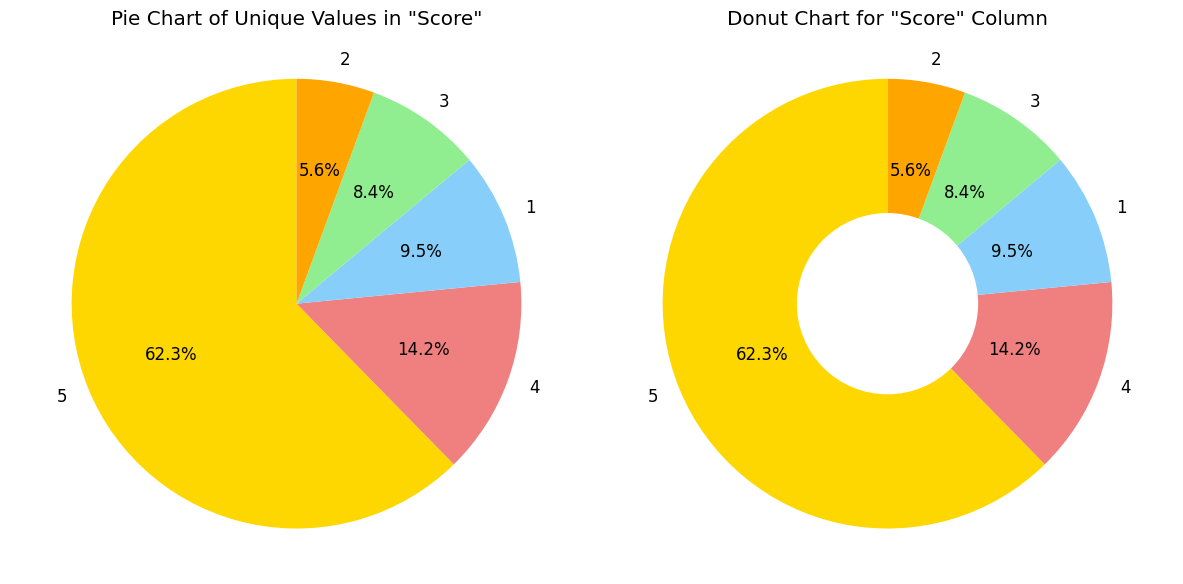

In [209]:
# Defining custom colors for the charts
custom_colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'orange']

# Creating a new figure and setting the size of the subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(value_counts, labels=value_counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Pie Chart of Unique Values in "Score"')

# Creating the donut chart in the second subplot
plt.subplot(1, 2, 2)
plt.pie(value_counts, labels=value_counts.index, colors=custom_colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

# Adding a white circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.40, color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Setting the font size and title for the donut chart
plt.rcParams['font.size'] = 12
plt.title('Donut Chart for "Score" Column')
plt.tight_layout()
plt.show()


In [171]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [172]:
# Defining a function to apply sentiment analysis and return a Series of sentiment scores
def analyze_sentiment(Text):
    sentiment_scores = sia.polarity_scores(Text)
    return pd.Series([sentiment_scores['pos'], sentiment_scores['neg'], sentiment_scores['neu']])

In [173]:
# Applying sentiment analysis and create new columns
data[['Positive', 'Negative', 'Neutral']] = data['Text'].apply(analyze_sentiment)
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Positive,Negative,Neutral
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.305,0.000,0.695
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.000,0.138,0.862
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.155,0.091,0.754
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,0.000,1.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.448,0.000,0.552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,14994,B000EGZ99M,A3DMMQXR7HUTKU,wood,1.0,1,5,1288051200,Great orzo pasta,Great pasta but can't find it at any local sto...,0.204,0.000,0.796
14995,14996,B000EGZ99M,AH720G9X1MIQ8,KJT,1.0,1,5,1255824000,Rice Select Whole Wheat Orzo,Could no longer find Rice Select Whole Wheat O...,0.352,0.061,0.587
14997,14998,B000EGZ99M,A1GY0FE07QFFLF,Arlington Cory,0.0,0,5,1326585600,Whole Wheat Orzo Tasty and Versatile,"Hard to find whole wheat orzo in supermarket, ...",0.118,0.031,0.852
14998,14999,B000EGZ99M,A2N8ZFDXI5T6BW,Beverleaf,0.0,0,5,1322179200,Whole grain deliciousness,"This product is delicious, and healthier than ...",0.291,0.000,0.709


Randomly Selected Product: B002RPKSXU
Total Positive Score: 0.292
Total Negative Score: 0.088
Total Neutral Score: 0.62
Overall Sentiment: Neutral


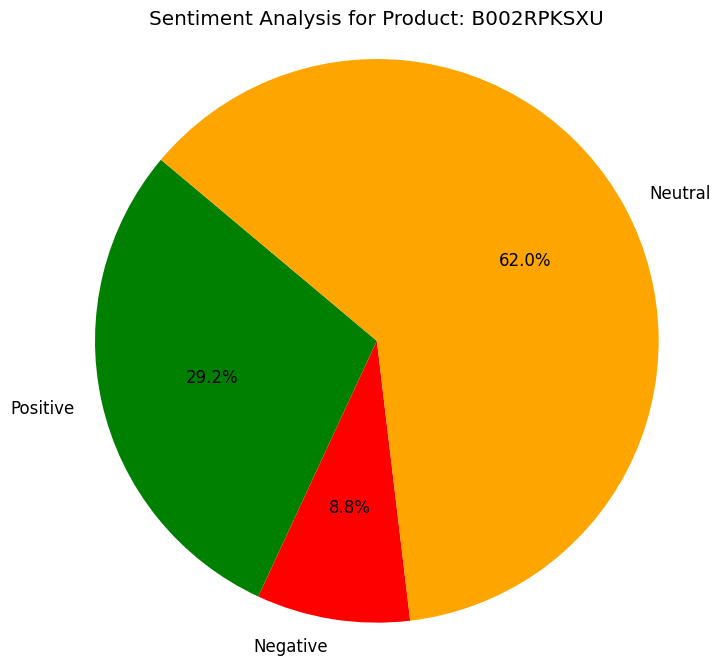

In [213]:
# Getting a random product from the DataFrame
random_product = random.choice(data['ProductId'].unique())

# Filtering the DataFrame for the random product
product_data = data[data['ProductId'] == random_product]

# Calculating the sum of positive, negative, and neutral scores for the random product
total_positive = product_data['Positive'].sum()
total_negative = product_data['Negative'].sum()
total_neutral = product_data['Neutral'].sum()

# Determining the overall sentiment for the random product
sentiment_scores = {
    'Positive': total_positive,
    'Negative': total_negative,
    'Neutral': total_neutral
}

overall_sentiment = max(sentiment_scores, key=sentiment_scores.get)

# Printing the total scores and the overall sentiment for the random product
print(f"Randomly Selected Product: {random_product}")
print(f"Total Positive Score: {total_positive}")
print(f"Total Negative Score: {total_negative}")
print(f"Total Neutral Score: {total_neutral}")
print(f"Overall Sentiment: {overall_sentiment}")

# Creating a pie chart with custom colors
custom_colors = ['green', 'red', 'orange']
sentiments = ['Positive', 'Negative', 'Neutral']
scores = [total_positive, total_negative, total_neutral]
plt.figure(figsize=(8, 8))
plt.pie(scores, labels=sentiments, colors=custom_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f'Sentiment Analysis for Product: {random_product}')
plt.show()